# CNN Filters

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
import imageio as imageio
import torch
import torch.nn as nn
from   torchinfo    import summary  

(128, 256)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4024\2746940283.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("images/yoga.jpg")


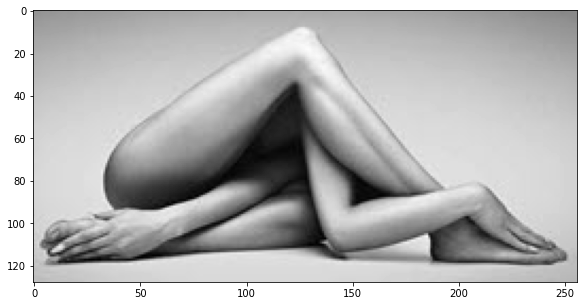

In [5]:
im = imageio.imread("images/yoga.jpg")
im = im.mean(axis=2)
shape = im.shape
print(shape)

plt.figure(figsize=(10, 5))  
plt.imshow(im, cmap="gray")

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


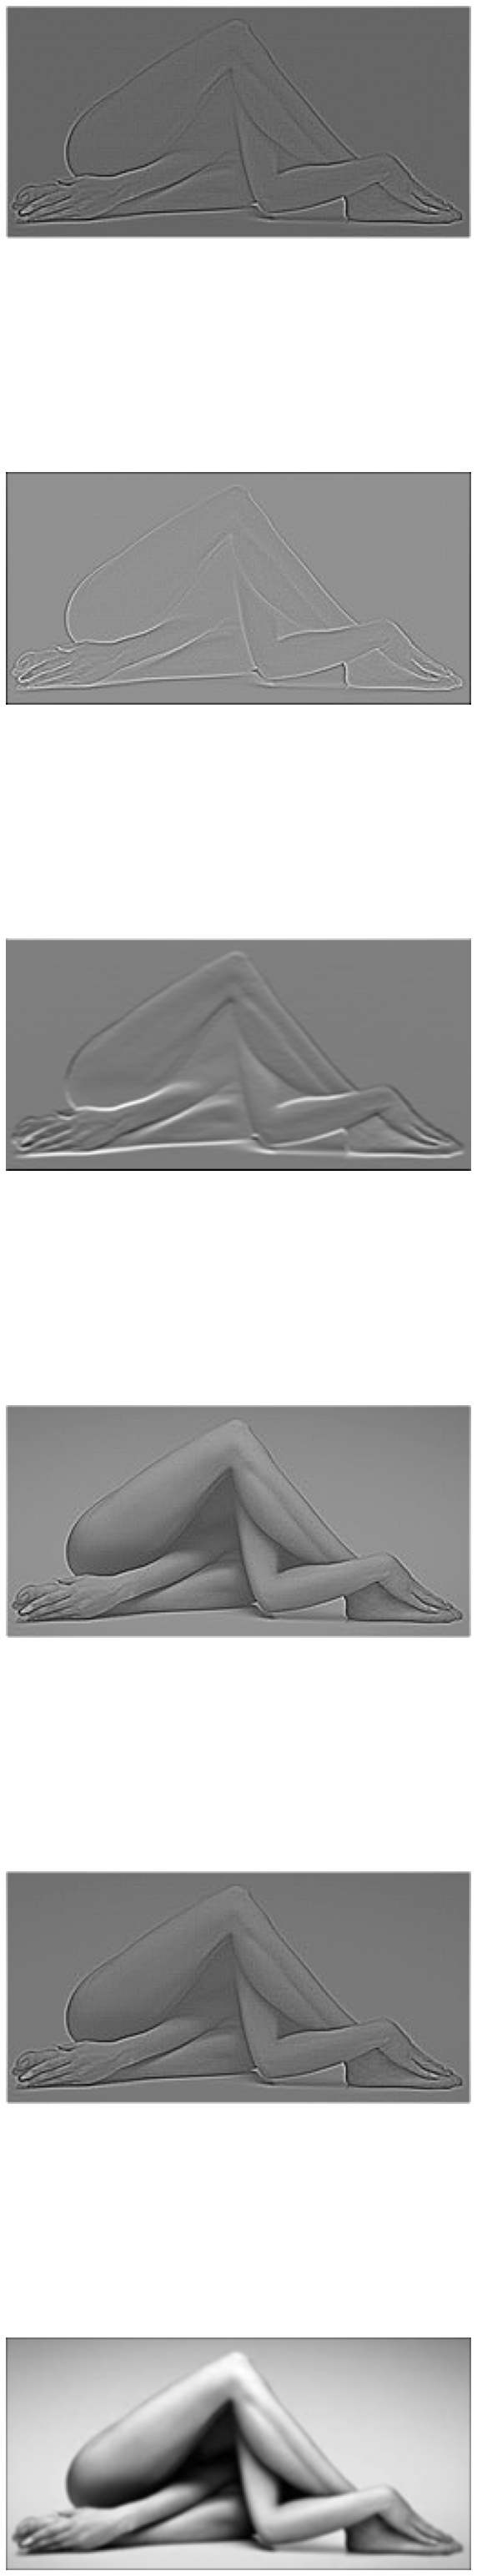

In [8]:
conv = nn.Conv2d(1,1,  kernel_size=3,  bias=False, padding=1)
print( conv ) 

filters = [    
    [[-1.,-1.,-1.],     # Ridge detection
     [-1.,+8.,-1.],
     [-1.,-1.,-1.]],   

     [[ 0.,1., 0.],     # Laplas
     [  1.,-4., 1.],
     [ 0., 1., 0.]],   
    
     [[ -1.,-1., -1.],     
     [  0.,0., 0.],
     [ 1., 1., 1.]],   
        
    
    
    [[ 0.,-1., 0.],     # Sharpen
     [-1.,+5.,-1.],
     [ 0.,-1., 0.]],   

   
    [[ -1.,-1., -1.],     # Sharpen
     [-1.,  9., -1.],
     [ -1.,-1., -1.]],       
    
    
    [[ 0.063,0.125, 0.063],     # Gaussian blur 3 × 3
     [ 0.125, 0.250, 0.125],
     [ 0.063,0.125, 0.063]],           
]
    


plt.figure(figsize=(10, 10*len(filters)))      
for i, f in enumerate(filters):    
    plt.subplot(len(filters),1, i + 1)
    with torch.no_grad():
        conv.weight.copy_(torch.tensor(filters[i]))
        im1 = conv(torch.tensor(im.reshape( (1,)+shape), dtype=torch.float32 ))    
        plt.axis("off")

        plt.imshow(im1.numpy().reshape(shape), cmap="gray")
plt.show()

In [54]:
X = torch.tensor( [[
                     [
                         [0,1,5],
                         [0,1,0],
                         [2,1,3],
                     ],
                                       [
                         [0,1,7],
                         [0,1,0],
                         [8,1,2],
                     ], 
                  ]], dtype=torch.float32)

pool = nn.MaxPool2d(2, 1)
pool(X)

tensor([[[[1., 5.],
          [2., 3.]],

         [[1., 7.],
          [8., 2.]]]])

In [60]:
conv = nn.Conv2d(2,5,  kernel_size=3,  bias=False, padding=0)
print(conv(X))

conv.weight.shape

tensor([[[[ 1.3868]],

         [[-0.3597]],

         [[-1.4197]],

         [[ 0.1863]],

         [[-2.0058]]]], grad_fn=<ConvolutionBackward0>)


torch.Size([5, 2, 3, 3])

In [13]:
1-70/2400

0.9708333333333333